## Quick view to the generated skytemplates, from modified crosstalk matrices and the set already in the framework 

In [2]:
import os
import sys
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import fitsio
%matplotlib inline

In [3]:
fnm1 = 'skytemplate_y4_e1_g_n04.fits'
fnm2 = 'skytemplate_y4_e1_g_n04_XT45x.fits'
fnm3 = 'Y4A1_20160801t1215_g_c03_r2930p01_skypca-tmpl.fits'
fnm4 = 'Y4A1_20160801t1215_g_c03_r2930p02_skypca-tmpl.fits'

### Compare using the Y4E2 CCD03 as template. PCA components 1 and 2

In [4]:
def read_fits(f):
    return fitsio.FITS(f)

In [5]:
# Each extension 0 has a matrix of dims: [4,4096,2048]
xt0 = read_fits(fnm1)
xt0 = xt0[0].read()
xt45 = read_fits(fnm2)
xt45 = xt45[0].read()
e1 = read_fits(fnm3)
e1 = e1[0].read()
e2 = read_fits(fnm4)
e2 = e2[0].read()

## Following 2 functions were taken from _http://prancer.physics.louisville.edu/astrowiki/index.php/Image_processing_with_Python_and_SciPy_

In [6]:
# Define a function for making a linear gray scale
def lingray(x, a=None, b=None):
    """
    Auxiliary function that specifies the linear gray scale.
    a and b are the cutoffs : if not specified, min and max are used
    """
    if a == None:
        a = np.min(x)
    if b == None:
        b = np.max(x)
    return 255.0 * (x-float(a))/(b-a)

In [7]:
# Define a function for making a logarithmic gray scale
def loggray(x, a=None, b=None):
    """
    Auxiliary function that specifies the logarithmic gray scale.
    a and b are the cutoffs : if not specified, min and max are used
    """
    if a == None:
         a = np.min(x)
    if b == None:
         b = np.max(x)          
    linval = 10.0 + 990.0 * (x-float(a))/(b-a)
    return (np.log10(linval)-1.0)*0.5 * 255.0

## Quick stats

In [8]:
def quick_stat(arr):
    for i in range(arr.shape[0]):
        x = arr[i, :, :]
        print('-------\nLevel {0}'.format(i + 1))
        print('<x>={0:.3f} ; med(x)={1:.3f} ; std(x)={2:.3f}'.format(np.mean(x), 
                                                                     np.median(x), 
                                                                     np.std(x)))
        print('min(x)={0:.3f} ; max(x)={1:.3f}'.format(np.min(x), np.max(x)))

In [9]:
quick_stat(xt0)

-------
Level 1
<x>=0.958 ; med(x)=1.003 ; std(x)=38.298
min(x)=-28733.625 ; max(x)=101841.477
-------
Level 2
<x>=1.052 ; med(x)=1.018 ; std(x)=37.297
min(x)=-28023.865 ; max(x)=99325.852
-------
Level 3
<x>=1.628 ; med(x)=1.174 ; std(x)=38.710
min(x)=-29012.719 ; max(x)=102830.680
-------
Level 4
<x>=1.046 ; med(x)=1.052 ; std(x)=36.966
min(x)=-27469.086 ; max(x)=97359.531


In [10]:
quick_stat(xt45)

-------
Level 1
<x>=1.026 ; med(x)=1.000 ; std(x)=37.159
min(x)=-27622.449 ; max(x)=97845.766
-------
Level 2
<x>=1.124 ; med(x)=1.016 ; std(x)=36.179
min(x)=-26923.264 ; max(x)=95369.070
-------
Level 3
<x>=1.704 ; med(x)=1.178 ; std(x)=37.562
min(x)=-27881.176 ; max(x)=98762.242
-------
Level 4
<x>=1.113 ; med(x)=1.047 ; std(x)=35.997
min(x)=-26422.816 ; max(x)=93596.359


In [11]:
quick_stat(e1)

-------
Level 1
<x>=0.949 ; med(x)=1.001 ; std(x)=26.001
min(x)=-36252.477 ; max(x)=57633.164
-------
Level 2
<x>=0.788 ; med(x)=0.820 ; std(x)=18.627
min(x)=-25727.100 ; max(x)=40900.215
-------
Level 3
<x>=2.092 ; med(x)=2.160 ; std(x)=43.140
min(x)=-60502.816 ; max(x)=96185.664
-------
Level 4
<x>=0.977 ; med(x)=1.051 ; std(x)=32.204
min(x)=-44799.391 ; max(x)=71220.805


In [12]:
quick_stat(e2)

-------
Level 1
<x>=0.959 ; med(x)=1.002 ; std(x)=10.231
min(x)=-2429.275 ; max(x)=14208.346
-------
Level 2
<x>=-2.099 ; med(x)=-2.150 ; std(x)=15.525
min(x)=-21040.871 ; max(x)=3597.468
-------
Level 3
<x>=-0.778 ; med(x)=-0.817 ; std(x)=9.807
min(x)=-13719.229 ; max(x)=2345.648
-------
Level 4
<x>=0.499 ; med(x)=0.554 ; std(x)=7.830
min(x)=-1608.109 ; max(x)=8800.141


# Testing best way to show the wedge for xtalk variations

### Plot showing only values of interest. CCD=03

In [62]:
def compare_against(level, xt0, xt45, e1, e2):
    plt.close('all')
    fig, ax = plt.subplots(1, 3, figsize=(16, 9))

    # Set up a colormap: use copy so that we do not mutate the global colormap instance
    palette = copy.copy(plt.cm.tab20)
    palette.set_over('black', 1.0)
    palette.set_under('white', 1.0)
    palette.set_bad('magenta', 1.0)

    #
    # Crosstalk 3B-2B being null, compared to Y4 Epoch 2
    #
    arr = xt0[level, :, :] - e2[level, :, :]
    arr_msk = np.ma.masked_where(np.logical_or(arr > (np.mean(arr) + np.std(arr)), 
                                               arr < (np.mean(arr) - np.std(arr))), arr)

    # Get values range
    # Use them for all the plots, to get an unique colorbar
    print(np.mean(arr_msk.compressed()), np.std(arr_msk.compressed()), 
          np.min(arr_msk.compressed()), np.max(arr_msk.compressed()))
    if level == 0:
        val_min = -np.std(arr_msk.compressed())/3. # np.mean(arr_msk.compressed())
        val_max = 0 + 1. * np.std(arr_msk.compressed())/3. # np.mean(arr_msk.compressed()) 
    elif level == 1:
        val_min = - np.std(arr_msk.compressed()) # np.mean(arr_msk.compressed())
        val_max = 0 + 3. * np.std(arr_msk.compressed()) # np.mean(arr_msk.compressed())
    elif level == 2:
        val_min = - np.std(arr_msk.compressed()) # np.mean(arr_msk.compressed())
        val_max = 0 + 3. * np.std(arr_msk.compressed()) # np.mean(arr_msk.compressed())
    elif level == 3:
        val_min = - np.std(arr_msk.compressed()) # np.mean(arr_msk.compressed())
        val_max = 0 + 3. * np.std(arr_msk.compressed()) # np.mean(arr_msk.compressed())        
        
    img1 = ax[0].imshow(arr_msk, vmin=val_min, vmax=val_max, cmap=palette, origin='lower')

    #
    # Crosstalk 3B-2B being 45x higher, compared to Y4 Epoch 2
    #
    arrB = xt45[level, :, :] - e2[level, :, :]
    arrB_msk = np.ma.masked_where(np.logical_or(arrB > (np.mean(arrB) + np.std(arrB)), 
                                                arrB < (np.mean(arrB) - np.std(arrB))), arrB)

    # Get values range
    print(np.mean(arrB_msk.compressed()), np.std(arrB_msk.compressed()), 
          np.min(arrB_msk.compressed()), np.max(arrB_msk.compressed()))

    img2 = ax[1].imshow(arrB_msk, vmin=val_min, vmax=val_max, cmap=palette, origin='lower')

    #
    # Original skytemplate for Y4 Epoch 1, compared to Y4 Epoch 2
    #
    arrC = e1[level, :, :] - e2[level, :, :]
    arrC_msk = np.ma.masked_where(np.logical_or(arrC > (np.mean(arrC) + np.std(arrC)), 
                                                arrC < (np.mean(arrC) - np.std(arrC))), arrC)

    # Get values range
    print(np.mean(arrC_msk.compressed()), np.std(arrC_msk.compressed()), 
          np.min(arrC_msk.compressed()), np.max(arrC_msk.compressed()))

    img3 = ax[2].imshow(arrC_msk, vmin=val_min, vmax=val_max, cmap=palette, origin='lower')


    # Set titles, and labels
    plt.suptitle('PCA level {0}, comparison against Y4E2 skytemplate. CCD=03'.format(level + 1), fontsize=15)
    ax[0].set_title('xtalk 3B-2B null minus Epoch 2', color='b')
    ax[1].set_title('xtalk 3B-2B 45x minus Epoch 2', color='b')
    ax[2].set_title('Epoch 1 minus Epoch 2', color='b')


    #
    plt.subplots_adjust(left=0.1, bottom=0.15, right=0.9, top=0.9, wspace=0.1, hspace=0.2)
    [left, bottom, width, height] = [0.3, 0.025, 0.4, 0.025]
    cbar_ax = fig.add_axes([left, bottom, width, height])
    plt.colorbar(img1, orientation='horizontal', cax=cbar_ax, label='Scale of the difference images')

    plt.savefig('skytemplate_PCAn{0}_comparison.png'.format(level + 1), formta='png', dpi=400)


0.00767248 0.281585 -38.3763 38.3676
0.00807928 0.441565 -37.1067 36.8835
0.00503979 0.246187 -21.6735 26.1488


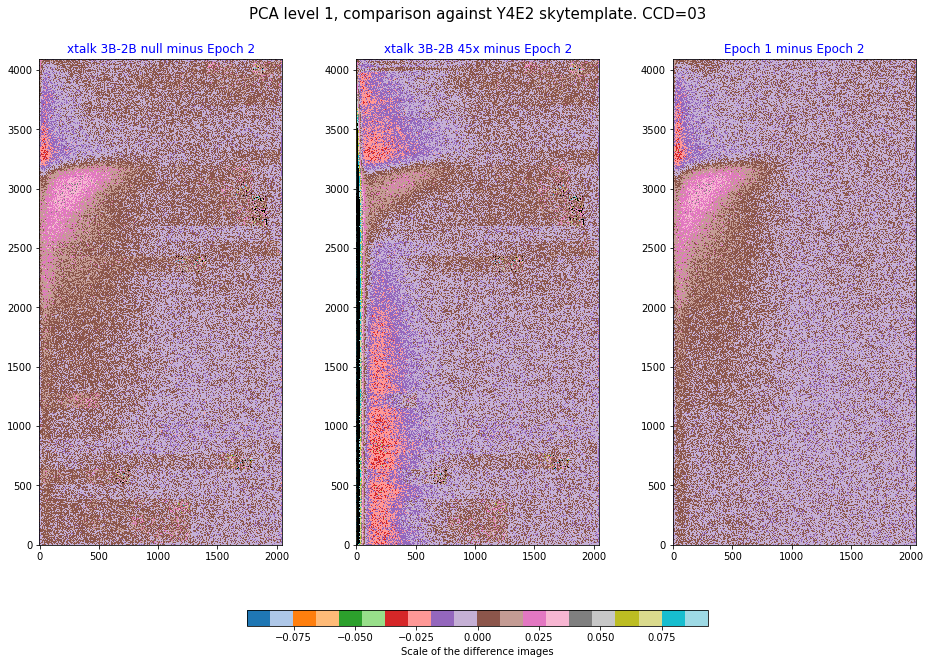

In [56]:
compare_against(0, xt0, xt45, e1, e2)

3.25039 1.61301 -38.4942 44.818
3.24907 1.5888 -37.4595 43.9255
2.99792 1.27449 -11.5092 29.3252


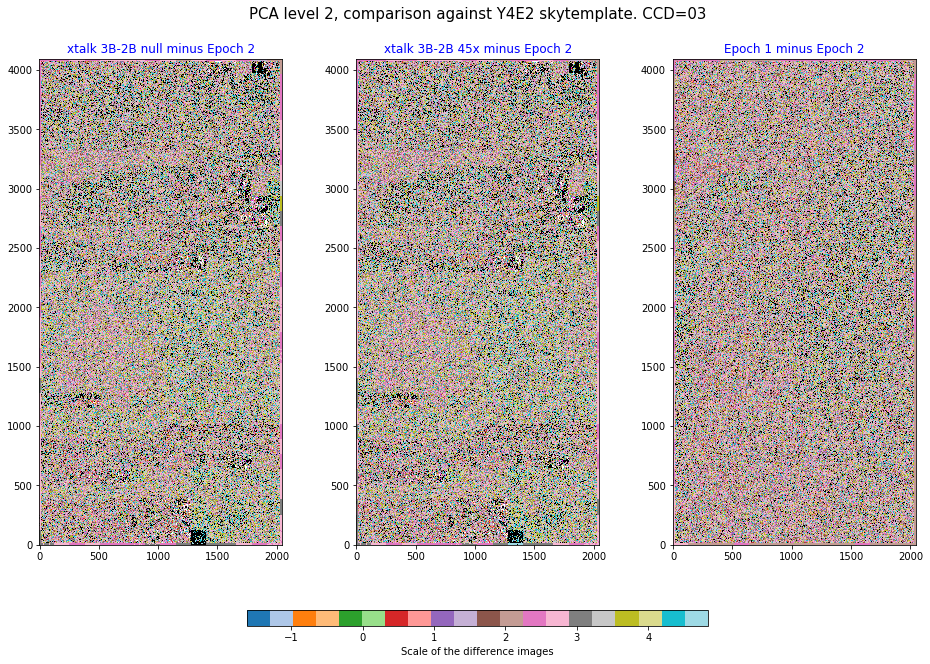

In [59]:
compare_against(1, xt0, xt45, e1, e2)

2.51013 1.8077 -38.7255 43.545
2.51423 1.80726 -37.6074 42.581
3.01335 1.47338 -3.47894 48.7249


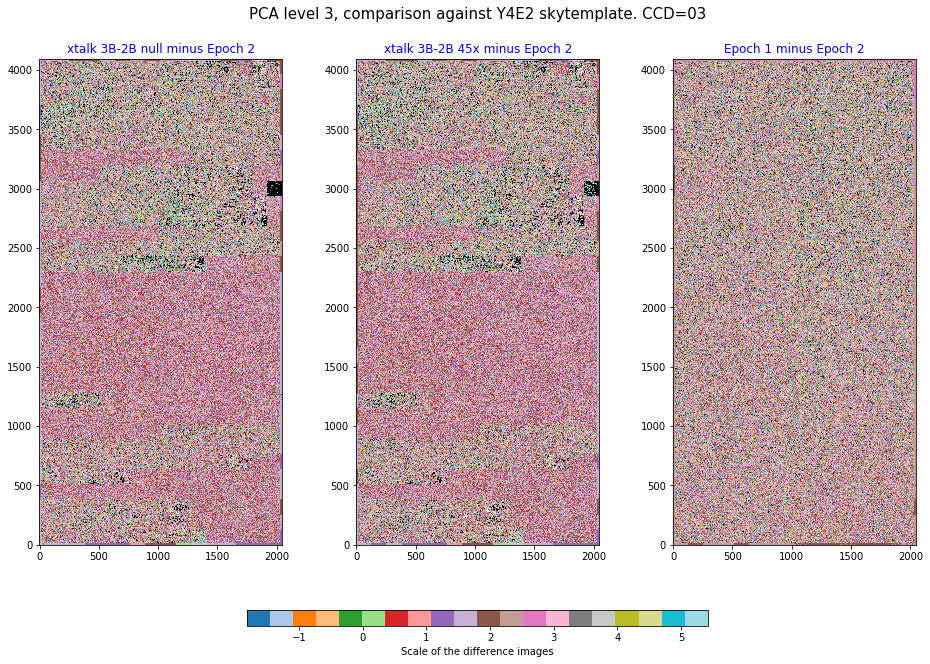

In [61]:
compare_against(2, xt0, xt45, e1, e2)

0.584647 2.40428 -36.2542 37.3497
0.578363 2.4147 -35.1911 36.4207
0.520057 2.20023 -11.4735 32.0645


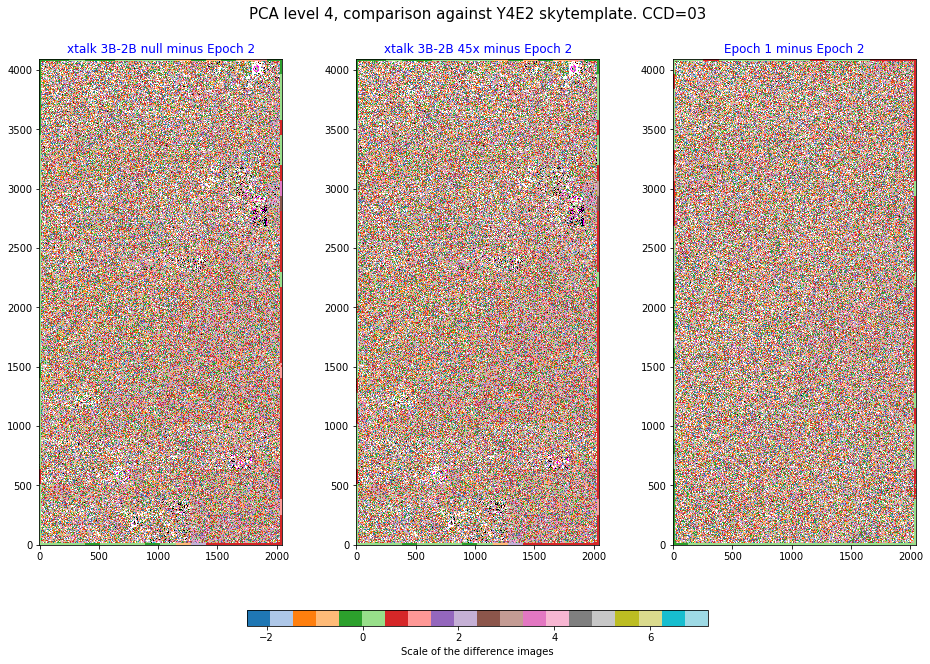

In [63]:
compare_against(3, xt0, xt45, e1, e2)

/Users/fco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/fco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


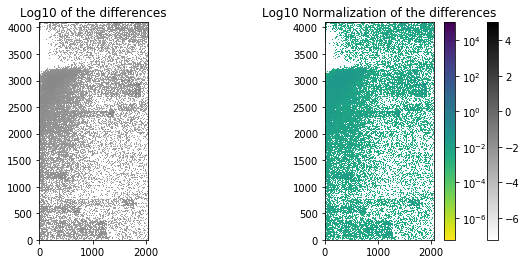

In [13]:
plt.close('all')
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
arr = xt0[0, :, :] - e2[0, :, :]
img1 = ax[0].imshow(np.log10(arr), cmap='gray_r', origin='lower')
img2 = ax[1].imshow(arr, cmap='viridis_r', origin='lower', norm=LogNorm())
ax[0].set_title('Log10 of the differences')
ax[1].set_title('Log10 Normalization of the differences')
plt.colorbar(img1)
plt.colorbar(img2)
arr = None